In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Plot style
plt.style.use("seaborn-whitegrid")

In [2]:
# Load Data
df = sns.load_dataset("diamonds")

# Split Data
train, test = train_test_split(
    df, 
    train_size = .80,
    test_size =.20,
    random_state=42
)

train, val = train_test_split(
    train,
    train_size = .80,
    test_size = .20,
    random_state=42
)

In [3]:
# we can see here we have threre categories variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
# return all columns except the category
def cleaner(df):
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df


# for cost functions
def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    ls = [mse, mae, rmse]
    ls2 = ["MSE", "MAE", "RMSE"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict


In [5]:
train_numeric = cleaner(train)
val_numeric = cleaner(val)
test_numeric = cleaner(test)

In [6]:
# Create X, y train and validation sets

target = "price"
# for the train 
X_train = train_numeric.drop(target, axis=1)
y_train = train_numeric[target]
# validiation 
X_val = val_numeric.drop(target, axis=1)
y_val = val_numeric[target]
# test 
X_test = test_numeric.drop(target, axis=1)
y_test = test_numeric[target]


# Standard Scaler

In [7]:
# Create scaler object
scaler = StandardScaler()

# Apply it to the train , validation and test 
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Train the first model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [9]:
# validiation
lr.score(X_val_scaled, y_val)

0.8661014078099777

In [10]:
# test
lr.score(X_val_scaled, y_val)

0.8661014078099777

In [11]:
# for the validition 
result_val = calc_cost(y_val, lr.predict(X_val_scaled))

MSE: 2109905.5491603212
MAE: 874.8336552092414
RMSE: 1452.5513929497715


In [12]:
# for the Test
result_test = calc_cost(y_test, lr.predict(X_test_scaled))

MSE: 2242411.878050298
MAE: 889.4218078106036
RMSE: 1497.4684898355283


# Robust Scaler

<AxesSubplot:>

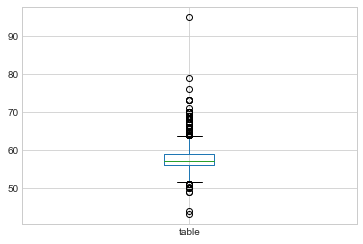

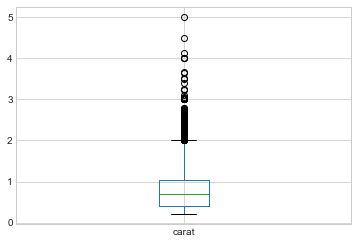

In [13]:
# here the outliers , and this Scaler to deal wit them
# The two plots down , they are just example
df[["table"]].plot(kind="box")
df[["carat"]].plot(kind="box")

In [14]:
# Create scaler object
scaler_r = RobustScaler()

# Apply it to the train , validation and test 
X_train_robust = scaler_r.fit_transform(X_train)
X_val_robust = scaler_r.transform(X_val)
X_test_robust = scaler_r.transform(X_test)

In [15]:
# train the second Model 
lr_r = LinearRegression()
lr_r.fit(X_train_robust, y_train)

LinearRegression()

In [16]:
# Validation
lr_r.score(X_val_robust, y_val)

0.8661014078099777

In [17]:
# test
lr_r.score(X_test_robust, y_test)

0.8589396072085458

In [18]:
# for the validition 
result_val_r = calc_cost(y_val, lr_r.predict(X_val_robust))

MSE: 2109905.5491603217
MAE: 874.8336552092413
RMSE: 1452.5513929497715


In [19]:
# for the test
result_test_r = calc_cost(y_test, lr_r.predict(X_test_robust))

MSE: 2242411.878050298
MAE: 889.4218078106034
RMSE: 1497.4684898355283


# Min Max Scaler

In [20]:
# Create scaler object
scaler_mm = MinMaxScaler()

# Apply it to the train , validation and test 
X_train_mm = scaler_mm.fit_transform(X_train)
X_val_mm = scaler_mm.transform(X_val)
X_test_mm = scaler_mm.transform(X_test)

In [21]:
# train the Third Model 
lr_mm = LinearRegression()
lr_mm.fit(X_train_mm, y_train)

LinearRegression()

In [22]:
# validation
lr_mm.score(X_val_mm, y_val)

0.8661014078099777

In [23]:
#test
lr_mm.score(X_test_mm, y_test)

0.8589396072085458

In [24]:
# for the validition 
result_val_mm = calc_cost(y_val, lr_mm.predict(X_val_mm))

MSE: 2109905.5491603217
MAE: 874.8336552092411
RMSE: 1452.5513929497715


In [25]:
# for the test
result_test_mm = calc_cost(y_test, lr_r.predict(X_test_mm))

MSE: 15091904.089211367
MAE: 2466.133129581301
RMSE: 3884.8299948918443


# Coefficients

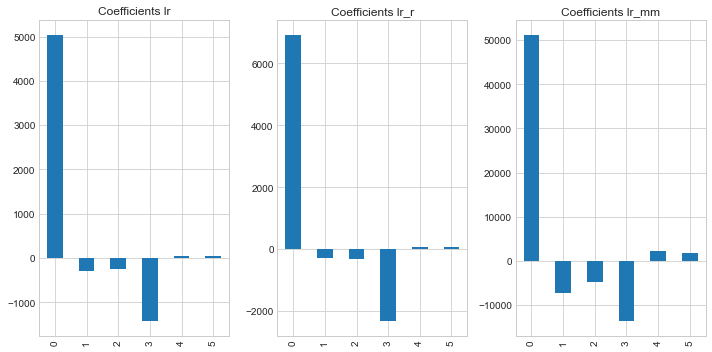

In [29]:
fig, ax = plt.subplots(1,3)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients lr", ax=ax[0])
pd.Series(lr_r.coef_).plot(kind="bar", title="Coefficients lr_r", ax=ax[1])
pd.Series(lr_mm.coef_).plot(kind="bar", title="Coefficients lr_mm", ax=ax[2], figsize=(10,5))
plt.tight_layout();

In [26]:
print("------- Validation -------\n")
print("Standard Scaler: ")
result_val = calc_cost(y_val, lr.predict(X_val_scaled))
print("\nRobust Scaler: ")
result_val_r = calc_cost(y_val, lr_r.predict(X_val_robust))
print("\nMin Max Scaler: ")
result_val_mm = calc_cost(y_val, lr_mm.predict(X_val_mm))


------- Validation -------

Standard Scaler: 
MSE: 2109905.5491603212
MAE: 874.8336552092414
RMSE: 1452.5513929497715

Robust Scaler: 
MSE: 2109905.5491603217
MAE: 874.8336552092413
RMSE: 1452.5513929497715

Min Max Scaler: 
MSE: 2109905.5491603217
MAE: 874.8336552092411
RMSE: 1452.5513929497715


In [27]:
print("------- Test -------\n")
print("Standard Scaler: ")
result_test = calc_cost(y_test, lr.predict(X_test_scaled))
print("\nRobust Scaler: ")
result_test_r = calc_cost(y_test, lr_r.predict(X_test_robust))
print("\nMin Max Scaler: ")
result_test_mm = calc_cost(y_test, lr_r.predict(X_test_mm))

------- Test -------

Standard Scaler: 
MSE: 2242411.878050298
MAE: 889.4218078106036
RMSE: 1497.4684898355283

Robust Scaler: 
MSE: 2242411.878050298
MAE: 889.4218078106034
RMSE: 1497.4684898355283

Min Max Scaler: 
MSE: 15091904.089211367
MAE: 2466.133129581301
RMSE: 3884.8299948918443
